In [22]:
# 다중회귀
# 앞서 진행해보았던 다항회귀와 이번에 다룰 다중회귀는 다름

In [23]:
# 이번에는 pandas를 사용, as는 해당 모듈을 간편하게 지정해서 부를때 사용 (pandas => pd)

import pandas as pd

In [24]:
df = pd.read_csv('https://bit.ly/perch_csv')
                  # 데이터셋이 있는 홈페이지

perch_full = df.to_numpy()
# pandas로 가져온 데이터프레임을 numpy 배열로 바꿔서 perch_full에 담음

In [25]:
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [26]:
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [27]:
# 다항 특성 만들기

# 사이킷런에서 제공하는 preprocessing의 PolynomialFeatures 사용
from sklearn.preprocessing import PolynomialFeatures

# 객체 생성
# degree = 2
# degree 매개변수는 제곱항을 만들어주는 역할(디폴트값= 2)
poly = PolynomialFeatures()
poly.fit([[2, 3]])

# 1(bias), 2, 3, 2**2, 2*3, 3**2
print(poly.transform(([[2, 3]])))
# 2와 3은 원래 있던 값을 그대로 가져옴
# 4,6,9는 2**2, 2*3, 3**2 으로 구해진 값
# 1은 절편은 위한 값으로 가상의 특성

[[1. 2. 3. 4. 6. 9.]]


In [28]:
# PolynomialFeatures -> 변환기 (특성변환 및 전처리) // fit -> transform
# 회귀모델이나 분류모델은 추정기라 부름 // fit -> predict -> score

In [29]:
poly = PolynomialFeatures(include_bias=False)
# 절편값을 위한 1이 필요가 없으므로 include_bias=False 로 1값을 제거

# 훈련세트 변환
poly.fit(train_input)
train_poly = poly.transform(train_input)

print(train_poly.shape)

(42, 9)


In [30]:
# 9개로 늘어난 특성 확인
poly.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [31]:
# 테스트세트도 변환
test_poly = poly.transform(test_input)

In [32]:
# 훈련세트와 테스트세트가 준비되었다면 방법은 앞전과 똑같음

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982124
0.9714559911594132


In [33]:
# 훈련점수와 테스트점수를 본 결과
# 앞전에 확인했던 결과보다 더 나아졌다고 볼 수 있음(과소적합되었던 문제도 해결됨)

In [34]:
# 더 많은 특성 만들기
# 더 많은 특성을 만들기 위해 기본값이 2였던 degree값을 5로 올려줌
# 절편값을 위한 1값은 이번에도 제외
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

print(train_poly.shape)

(42, 55)


In [35]:
# 특성이 55개로 엄청나게 많아짐

In [36]:
lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9999999999991096
-144.40579242335605


In [37]:
# 훈련점수와 테스트점수를 본 결과 어마어마하게 이상한 값을 내놓은 것을 확인
# 훈련 할 땐 대부분 맞췄지만, 테스트 할 땐 하나도 맞추지 못한 것과 비슷함
# 극도로 과대적합 되었다고 볼 수 있다
# 이유는 학습해야 할 훈련 양보다 사용해야 할 재료(특성)이 더 많았기 때문

# 이제 이렇게 과대적합된 문제를 규제를 통해 해결하려 한다
# 이를 정규화라고 하는데, 통계에서 많이 들어본 정규화와는 다르기 때문에
# 용어 혼동을 피하기 위해 규제라고 부르겠음

In [38]:
# 이 규제를 통해 과대적합을 완화할 수 있는데
# 가중치(기울기)값을 작게 만드는 것이 규제의 역할
# 대표적으로 릿지와 라쏘 모델을 사용

In [39]:
# 규제 전, 표준화
# 규제하는 방법은 선형 모델에 가중치가 크면 벌칙을 가하게 되는 방식
# 규제를 하기 위해선 처음 k-최근접이웃 모델을 구현할 때엔 다른 범위의 값의 스케일을 조정해준 것과 같이
# 표준화를 시켜주어야 함
# 표준점수를 만드는 사이킷런 preprocessing의 StandardScaler함수를 사용
# 훈련스케일과 테스트스케일을 똑같이 표준화 함
# 모든 transform 이런 스타일로 사용하는 것이 바람직하고 실수를 방지할 수 있음
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [40]:
# 릿지 회귀
from sklearn.linear_model import Ridge

# 객체 생성과 사용법은 앞선 방법과 비슷
ridge = Ridge()
# 표준화 된 훈련점수와 타겟값을 fit함
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615397


In [42]:
# 훈련점수와 테스트점수를 출력해본 결과
# 극도로 나빴던 두 점수가 훨씬 좋아진 것을 볼 수 있음

# 가중치의 제곱을 벌칙으로 사용한 이 방법을 L2 규제라고도 함

# 릿지 규제 강도 조정
# 릿지 모델은 alpha 값(디폴트=1)이 있는데 알파값을 조정하면서 최적값을 찾아야 함

In [45]:
train_score = []
test_score = []

In [46]:
# 적절한 규제 강도 찾기

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
# 알파값을 6개 생성하여 for을 이용해 하나씩 돌려봄

for alpha in alpha_list:
  # 릿지 모델 생성
  ridge = Ridge(alpha=alpha)
  # 릿지 모델 훈련
  ridge.fit(train_scaled, train_target)
  # 훈련 점수와 테스트 점수를 저장
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

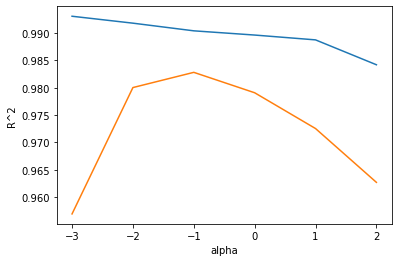

In [47]:
import matplotlib.pyplot as plt

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
# 넘파이의 log10을 이용(x축이 동일하게 나오도록)

plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [48]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386927


In [49]:
# 결과값을 보면 알파값을 0.1로 설정했을 때
# 과대적합되지도 않고 과소적합되지도 않은 최적의 값인 걸 알 수 있음

In [51]:
# 라쏘 회귀

# 라쏘는 릿지와 다르게 가중치의 절댓값에 벌칙을 주는 방법으로 L1 규제라고 함
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


In [55]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델 생성
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델 훈련
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수 저장
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


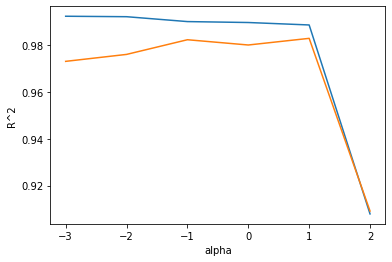

In [56]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [57]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [58]:
# 일반적으론 L1(라쏘)규제보단 L2(릿지)규제를 많이 사용함
# 라쏘는 특성의 가중치를 0으로 만들어 특성을 아에 사용하지 않기도 함

# 사용한 특성의 개수를 알아보는 방법
# 라쏘의 coef_의 값이 0인 값을 출력
print(np.sum(lasso.coef_ == 0))

40


In [ ]:
# 40개의 특성의 가중치를 0으로 만들어 사용하지 않았으니
# 총 55개의 특성 중에서 15개만 사용했다고 볼 수 있음

# 이렇게 과대적합과 과소적합을 피하기 위해 모델에 규제(L1(라쏘),L2(릿지))를 사용하여
# 특성을 만들거나 가공하는 것을 특성공학이라고 함